In [1]:
import nltk
from nltk.corpus import brown
from nltk import bigrams, ngrams, trigrams 
import tqdm
import numpy as np
import math
import re
import pdb
from collections import Counter

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/nilay/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
sent_list = [' '.join(sent) for sent in brown.sents()[0:40000]]
sent_list = [re.sub('[^A-Za-z ]', '', sent).lower() for sent in sent_list]
sent_list

['the fulton county grand jury said friday an investigation of atlantas recent primary election produced  no evidence  that any irregularities took place ',
 'the jury further said in termend presentments that the city executive committee  which had overall charge of the election   deserves the praise and thanks of the city of atlanta  for the manner in which the election was conducted ',
 'the septemberoctober term jury had been charged by fulton superior court judge durwood pye to investigate reports of possible  irregularities  in the hardfought primary which was won by mayornominate ivan allen jr ',
 ' only a relative handful of such reports was received   the jury said   considering the widespread interest in the election  the number of voters and the size of this city  ',
 'the jury said it did find that many of georgias registration and election laws  are outmoded or inadequate and often ambiguous  ',
 'it recommended that fulton legislators act  to have these laws studied and r

In [28]:
file = open('test_sentences.txt', 'r')
test_sentences = []
for line in file:
    test_sentences += [line[:-1]]
test_sentences

['he lived a good life',
 'the man was happy',
 'the person was good',
 'the girl was sad',
 'he won the war']

# Part 1 - No Smoothing

In [29]:
# UniGram
unigrams = []

def unigram_model():
    for elem in sent_list:
        unigrams.extend(elem.split())
    model = Counter(unigrams)
    total_unigrams = len(unigrams) + 2 * 40000
    for uni in model:
        model[uni] /= total_unigrams
    return model
    
uni_model = unigram_model()
total_unigrams = len(unigrams) + 2 * 40000
uni_model['<s>'] = 40000 / total_unigrams
uni_model['</s>'] = 40000 / total_unigrams
print(uni_model['<s>'])
print(uni_model['</s>'])

0.04677109873495871
0.04677109873495871


In [6]:
# BiGram

def bigram_model():
    model = {}
    for sent in sent_list:
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            model[w1] = model[w1] if w1 in model else {}
            model[w1][w2] = (model[w1][w2] + 1) if w2 in model[w1] else 1
    for w1 in model:
        total_bigrams = float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2] /= total_bigrams
    return model


bi_model = bigram_model()
bi_model

{'prowl': {'for': 1.0},
 'sportsmanship': {'and': 1.0},
 'more': {'</s>': 0.02587601078167116,
  'a': 0.00215633423180593,
  'able': 0.0005390835579514825,
  'about': 0.004851752021563342,
  'abundant': 0.0005390835579514825,
  'acceptable': 0.001078167115902965,
  'accepting': 0.0005390835579514825,
  'accurate': 0.0016172506738544475,
  'accurately': 0.001078167115902965,
  'acknowledges': 0.0005390835579514825,
  'active': 0.00215633423180593,
  'activity': 0.0005390835579514825,
  'acute': 0.0005390835579514825,
  'adequate': 0.0005390835579514825,
  'adequately': 0.0005390835579514825,
  'admirable': 0.0005390835579514825,
  'adoniram': 0.0005390835579514825,
  'adorable': 0.0005390835579514825,
  'advanced': 0.003234501347708895,
  'advantageous': 0.0005390835579514825,
  'advantageously': 0.0005390835579514825,
  'aerial': 0.0005390835579514825,
  'afraid': 0.0005390835579514825,
  'aggressive': 0.001078167115902965,
  'alert': 0.0005390835579514825,
  'alien': 0.000539083557951

In [7]:
# TriGram

def trigram_model():
    model = {}
    for sent in sent_list:
         for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            if (w1, w2) not in model:
                model[(w1, w2)] = {}
            if w3 not in model[(w1, w2)]:
                model[(w1, w2)][w3] = 0
            model[(w1, w2)][w3] += 1
    for (w1, w2) in model:
        total_trigrams = float(sum(model[(w1, w2)].values()))
        for w3 in model[(w1, w2)]:
            model[(w1, w2)][w3] /= total_trigrams
    return model

tri_model = trigram_model()
tri_model

{('own', 'dead'): {'</s>': 1.0},
 ('of', 'josephs'): {'partnership': 1.0},
 ('dedication', 'service'): {'he': 0.5, 'planned': 0.5},
 ('instance', 'they'): {'inevitably': 1.0},
 ('errors', 'or'): {'evidence': 1.0},
 ('place', 'loyalty'): {'as': 1.0},
 ('in', 'nor'): {'as': 1.0},
 ('called', 'meurons'): {'</s>': 1.0},
 ('architect', 'might'): {'reasonably': 1.0},
 ('damas', 'three'): {'years': 1.0},
 ('the', 'deterministic'): {'process': 1.0},
 ('tonio', 'kroger'): {'aschenbach': 1.0},
 ('with', 'contact'): {'cement': 1.0},
 ('san', 'jacinto'): {'trinity': 1.0},
 ('holds', '</s>'): {'</s>': 1.0},
 ('its', 'suffering'): {'being': 0.5, 'was': 0.5},
 ('incident', 'between'): {'bangjensen': 1.0},
 ('frontier', '</s>'): {'</s>': 1.0},
 ('and', 'tris'): {'ph': 1.0},
 ('no', 'food'): {'value': 1.0},
 ('mores', 'day'): {'and': 1.0},
 ('mennen', 'williams'): {'is': 1.0},
 ('from', 'ching'): {'</s>': 1.0},
 ('auburn', 'ny'): {'farm': 1.0},
 ('hunt', 'gripped'): {'the': 1.0},
 ('countless', 'scheme

In [8]:
# Top 10 values

def unigram_count():
    unigrams = []
    for elem in sent_list:
        unigrams.extend(elem.split())
    model = Counter(unigrams)
    return model

def bigram_count():
    model = {}
    for sent in sent_list:
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True):
            if w1 != None and w2 != None:
                model[(w1, w2)] = model.get((w1, w2), 0) + 1
    return model

def trigram_count():
    model = {}
    for sent in sent_list:
         for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True):
            if w1 != None and w2 != None and w3 != None:
                model[(w1, w2, w3)] = model.get((w1, w2, w3), 0) + 1
    return model

all_unigram_counts = [[w, n] for w, n in unigram_count().items()]
all_bigram_counts = [[w, n] for w, n in bigram_count().items()]
all_trigram_counts = [[w, n] for w, n in trigram_count().items()]

sorted_uni = sorted(all_unigram_counts, key=lambda val: val[1])
sorted_bi = sorted(all_bigram_counts, key=lambda val: val[1])
sorted_tri = sorted(all_trigram_counts, key=lambda val: val[1])

print("Top 10 unigrams:")
print(sorted_uni[-10:])
print("Top 10 bigrams:")
print(sorted_bi[-10:])
print("Top 10 trigrams:")
print(sorted_tri[-10:])

Top 10 unigrams:
[['it', 6051], ['for', 7788], ['that', 8240], ['is', 9474], ['in', 17705], ['a', 17780], ['to', 20341], ['and', 22092], ['of', 31276], ['the', 56448]]
Top 10 bigrams:
[[('that', 'the'), 1243], [('with', 'the'), 1261], [('to', 'be'), 1373], [('it', 'is'), 1390], [('for', 'the'), 1591], [('on', 'the'), 1821], [('and', 'the'), 1848], [('to', 'the'), 2819], [('in', 'the'), 4985], [('of', 'the'), 8508]]
Top 10 trigrams:
[[('a', 'number', 'of'), 118], [('there', 'is', 'a'), 118], [('it', 'is', 'not'), 126], [('of', 'the', 'united'), 127], [('part', 'of', 'the'), 131], [('the', 'fact', 'that'), 154], [('some', 'of', 'the'), 156], [('as', 'well', 'as'), 225], [('the', 'united', 'states'), 336], [('one', 'of', 'the'), 337]]


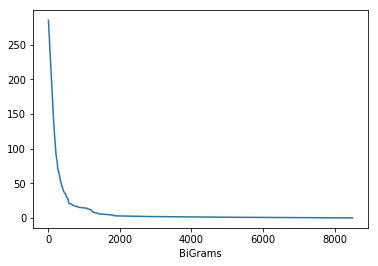

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

model = bigram_count()
uniq_bi_counts = list(set(list(bigram_count().values())))
uniq_bi_counts.sort(reverse=True)
rank_freq = dict((val, i) for i, val in enumerate(uniq_bi_counts))
x_vals = uniq_bi_counts
y_vals = [rank_freq[w] for w in uniq_bi_counts]

plt.plot(x_vals, y_vals)
plt.xlabel('BiGrams')
plt.show()

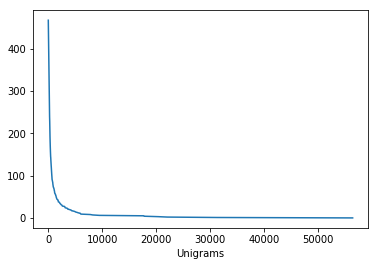

In [11]:
model = unigram_count()
uniq_uni_counts = list(set(unigram_count().values()))
uniq_uni_counts.sort(reverse=True)
rank_freq = dict((val, i) for i, val in enumerate(uniq_uni_counts))
x_vals = uniq_uni_counts
y_vals = [rank_freq[w] for w in uniq_uni_counts]


plt.plot(x_vals, y_vals)
plt.xlabel('Unigrams')
plt.show()

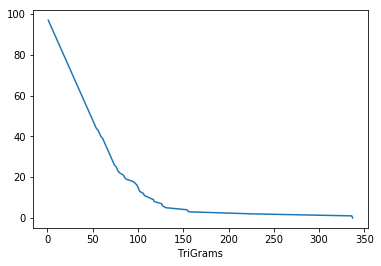

In [12]:
model = trigram_count()
uniq_tri_counts = list(set(list(trigram_count().values())))
uniq_tri_counts.sort(reverse=True)
rank_freq = dict((val, i) for i, val in enumerate(uniq_tri_counts))
x_vals = uniq_tri_counts
y_vals = [rank_freq[w] for w in uniq_tri_counts]

plt.plot(x_vals, y_vals)
plt.xlabel('TriGrams')
plt.show()

In [30]:
def compute_log_prob_no_smoothing():
    print("Unigram:")
    for sent in test_sentences:
        val, per = 0, 1
        for w in sent.split():
            val += np.log(uni_model.get(w, 0))
            per *= uni_model.get(w, 0)
        print(sent, val, (1.0 / per) ** (1.0 / len(sent.split())))
    print("BiGram:")
    for sent in test_sentences:
        val, per = 0, 1
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            if w1 in bi_model and w2 in bi_model[w1]:
                val += np.log(bi_model[w1][w2])
                per *= bi_model[w1][w2]
            else:
                val += np.log(0)
                per = 0
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))
    print("TriGram:")
    for sent in test_sentences:
        val, per = 0, 1
        for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            if (w1, w2) in tri_model and w3 in tri_model[(w1, w2)]:
                val += np.log(tri_model[(w1, w2)][w3])
                per *= tri_model[(w1, w2)][w3]
            else:
                val += np.log(0)
                per = 0
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))
compute_log_prob_no_smoothing()

Unigram:
he lived a good life -33.1867769216 763.0742839869649
the man was happy -24.3762012964 443.21293660835187
the person was good -23.7049887519 374.74552213454615
the girl was sad -27.6143332507 995.836724257661
he won the war -25.0232073949 521.0269921256837
BiGram:
he lived a good life -26.7648293511 211.23386195638668
the man was happy -21.9647887708 242.54740909943231
the person was good -24.7919697762 491.7608121184974
the girl was sad -inf inf
he won the war -20.9111628177 186.38057853513374
TriGram:
he lived a good life -inf inf
the man was happy -inf inf
the person was good -inf inf
the girl was sad -inf inf
he won the war -15.813380446 52.10938732373954


/home/nilay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/home/nilay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


# Part 2(i): Laplacian Smoothing

In [14]:
# UniGram Laplacian Smoothing

def count(k, num, denom):
    n = len(uni_model)
    return (k + num) / (k * n + denom)

def unigram_lap_smoothing(k):
    unigrams = []
    for elem in sent_list:
        unigrams.extend(elem.split())
    model = Counter(unigrams)
    total_unigrams = len(unigrams)
    for uni in model:
        model[uni] = count(k, model[uni], total_unigrams)
    return model
    
uni_lap_model = unigram_lap_smoothing(1)
uni_lap_model

Counter({'prowl': 2.451962980262924e-06,
         'more': 0.0022754216456839934,
         'functioned': 4.903925960525848e-06,
         'photek': 2.451962980262924e-06,
         'greenbugs': 2.451962980262924e-06,
         'cimabues': 2.451962980262924e-06,
         'farreaching': 4.903925960525848e-06,
         'disintegrative': 2.451962980262924e-06,
         'twosystem': 3.677944470394386e-06,
         'processing': 4.6587296624995555e-05,
         'accept': 8.214075983880796e-05,
         'toynbee': 1.1033833411183158e-05,
         'patriot': 1.3485796391446081e-05,
         'roving': 3.677944470394386e-06,
         'imperturbable': 2.451962980262924e-06,
         'terrier': 4.903925960525848e-06,
         'appearances': 1.7163740861840468e-05,
         'sixty': 1.4711777881577544e-05,
         'security': 0.0001066603896414372,
         'rosemary': 2.451962980262924e-06,
         'unavoidably': 4.903925960525848e-06,
         'peeled': 4.903925960525848e-06,
         'dreadfully':

In [16]:
# BiGram Laplacian Smoothing

def bigram_lap_smoothing(k):
    model = {}
    for sent in sent_list:
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True):
            model[w1] = model[w1] if w1 in model else {}
            model[w1][w2] = model[w1][w2] + 1 if w2 in model[w1] else 1
    for w1 in model:
        total_bigrams = float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2] = count(k, model[w1][w2], total_bigrams)
    return model

bi_lap_model = bigram_lap_smoothing(1)
bi_lap_model

{'prowl': {'for': 4.944987019409074e-05},
 'sportsmanship': {'and': 4.944987019409074e-05},
 'more': {None: 0.0011584198207995461,
  'a': 0.00011820610416321898,
  'able': 4.7282441665287594e-05,
  'about': 0.00023641220832643797,
  'abundant': 4.7282441665287594e-05,
  'acceptable': 7.092366249793139e-05,
  'accepting': 4.7282441665287594e-05,
  'accurate': 9.456488333057519e-05,
  'accurately': 7.092366249793139e-05,
  'acknowledges': 4.7282441665287594e-05,
  'active': 0.00011820610416321898,
  'activity': 4.7282441665287594e-05,
  'acute': 4.7282441665287594e-05,
  'adequate': 4.7282441665287594e-05,
  'adequately': 4.7282441665287594e-05,
  'admirable': 4.7282441665287594e-05,
  'adoniram': 4.7282441665287594e-05,
  'adorable': 4.7282441665287594e-05,
  'advanced': 0.0001654885458285066,
  'advantageous': 4.7282441665287594e-05,
  'advantageously': 4.7282441665287594e-05,
  'aerial': 4.7282441665287594e-05,
  'afraid': 4.7282441665287594e-05,
  'aggressive': 7.092366249793139e-05,

In [17]:
# TriGram Laplacian Smoothing

def trigram_lap_smoothing(k):
    model = {}
    for sent in sent_list:
         for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True):
            if (w1, w2) not in model:
                model[(w1, w2)] = {}
            if w3 not in model[(w1, w2)]:
                model[(w1, w2)][w3] = 0
            model[(w1, w2)][w3] += 1
    for (w1, w2) in model:
        total_trigrams = float(sum(model[(w1, w2)].values()))
        for w3 in model[(w1, w2)]:
            model[(w1, w2)][w3] = count(k, model[(w1, w2)][w3], total_trigrams)
    return model

tri_lap_model = trigram_lap_smoothing(1)
tri_lap_model

{('own', 'dead'): {None: 4.944987019409074e-05},
 ('of', 'josephs'): {'partnership': 4.944987019409074e-05},
 ('dedication', 'service'): {'he': 4.94486475794887e-05,
  'planned': 4.94486475794887e-05},
 ('instance', 'they'): {'inevitably': 4.944987019409074e-05},
 ('errors', 'or'): {'evidence': 4.944987019409074e-05},
 ('place', 'loyalty'): {'as': 4.944987019409074e-05},
 ('in', 'nor'): {'as': 4.944987019409074e-05},
 ('called', 'meurons'): {None: 4.944987019409074e-05},
 ('architect', 'might'): {'reasonably': 4.944987019409074e-05},
 ('damas', 'three'): {'years': 4.944987019409074e-05},
 ('the', 'deterministic'): {'process': 7.417297136923305e-05},
 ('tonio', 'kroger'): {'aschenbach': 4.944987019409074e-05},
 ('with', 'contact'): {'cement': 4.944987019409074e-05},
 ('san', 'jacinto'): {'trinity': 4.944987019409074e-05},
 ('its', 'suffering'): {'being': 4.94486475794887e-05,
  'was': 4.94486475794887e-05},
 ('incident', 'between'): {'bangjensen': 4.944987019409074e-05},
 ('and', 'tris'

In [18]:
def unigram_count():
    unigrams = []
    for elem in sent_list:
        unigrams.extend(elem.split())
    model = Counter(unigrams)
    model['<s>'] = 40000
    model['</s>'] = 40000
    return model

def bigram_count():
    model = {}
    for sent in sent_list:
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            model[w1] = model.get(w1, {})
            model[w1][w2] = model[w1].get(w2, 0) + 1
    return model

def trigram_count():
    model = {}
    for sent in sent_list:
        for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            model[(w1, w2)] = model.get((w1, w2), {})
            model[(w1, w2)][w3] = model[(w1, w2)].get(w3, 0) + 1
    return model


def compute_log_prob_lap_smoothing(k):
    model_uni = unigram_count()
    model_bi = bigram_count()
    model_tri = trigram_count()
    print("k =", k)
    print("Unigram:")
    for sent in test_sentences:
        val, per = 0, 1
        model = unigram_lap_smoothing(k)
        for w in sent.split():
            val += np.log(model.get(w, 1.0 / len(model_uni)))
            per *= model.get(w, 1.0 / len(model_uni))
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))
    print("BiGram:")
    for sent in test_sentences:
        val, per = 0, 1
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            w1_count = float(sum(model_bi.get(w1, {}).values()))
            val += np.log(count(k, model_bi.get(w1, {}).get(w2, 0), w1_count))
            per *= count(k, model_bi.get(w1, {}).get(w2, 0), w1_count)
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))
    print("TriGram:")
    for sent in test_sentences:
        val, per = 0, 1
        for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            w1w2_count = float(sum(model_tri.get((w1, w2), {}).values()))
            val += np.log(count(k, model_tri.get((w1, w2), {}).get(w3, 0), w1w2_count))
            per *= count(k, model_tri.get((w1, w2), {}).get(w3, 0), w1w2_count)
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))
compute_log_prob_lap_smoothing(1)
compute_log_prob_lap_smoothing(0.1)
compute_log_prob_lap_smoothing(0.01)
compute_log_prob_lap_smoothing(0.001)
compute_log_prob_lap_smoothing(0.0001)

k = 1
Unigram:
he lived a good life -32.9292159586 724.7619033300211
the man was happy -24.1675338903 420.68463714562273
the person was good -23.5062830531 356.5843305708292
the girl was sad -27.3570953275 933.8107848268966
he won the war -24.8151327155 494.6167295341016
BiGram:
he lived a good life -44.3498928537 7115.128499565497
the man was happy -35.3635977697 6911.206077643159
the person was good -37.0292458497 10480.917087693024
the girl was sad -41.3124594596 30580.409328683014
he won the war -34.9300635354 6201.310277908409
TriGram:
he lived a good life -60.9037032594 194997.23381528916
the man was happy -49.1613389841 217582.7998459531
the person was good -50.0108068131 269063.2344515137
the girl was sad -53.3177027896 615029.6133435647
he won the war -48.1166571628 167571.31330150258
k = 0.1
Unigram:
he lived a good life -32.7196486014 695.0124230403729
the man was happy -24.0022333102 403.6541017919533
the person was good -23.3320285667 341.38372630288603
the girl was sad -2

# Part 2(ii): Good Turing Smoothing

In [19]:
bi_list_count = {}
b_count = bigram_count()
for w1 in b_count:
    for w2 in b_count[w1]:
        bi_list_count[(w1, w2)] = b_count[w1][w2]

bi_freq_count = Counter(bi_list_count.values())
bi_freq_rank = sorted(list(bi_freq_count.keys()))
bi_freq_rank_dict = dict((k, i + 1) for i, k in enumerate(bi_freq_rank))
bi_r_bar = {}

for w1, w2 in bi_list_count:
    rank = bi_freq_rank_dict[bi_list_count[(w1, w2)]]
    if rank == len(bi_freq_rank):
        bi_r_bar[(w1, w2)] = 0
        continue
    bi_r_bar[(w1, w2)] = bi_freq_rank[rank] * bi_freq_count[bi_freq_rank[rank]] / bi_freq_count[bi_freq_rank[rank - 1]] 
            
zero_bigram_count = bi_freq_count[bi_freq_rank[0]] / (len(unigram_count()) * len(unigram_count()) - len(bigram_count()))
denom = float(sum(bi_list_count.values()))
smooth_turing_bigram = {}
for sent in test_sentences:
    val, per = 0, 1
    for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
        val += np.log(bi_r_bar.get((w1, w2), zero_bigram_count) / denom)
        per *= bi_r_bar.get((w1, w2), zero_bigram_count) / denom
    print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))

he lived a good life -64.661121978 413422.1048283198
the man was happy -49.7286251059 250736.1014729557
the person was good -52.7430675791 532728.3413866702
the girl was sad -64.9365546777 11230441.827289544
he won the war -50.0659074314 272795.2677518144


In [20]:
tri_list_count = {}
t_count = trigram_count()
for w1, w2 in t_count:
    for w3 in t_count[(w1, w2)]:
        tri_list_count[(w1, w2, w3)] = t_count[(w1, w2)][w3]

tri_freq_count = Counter(tri_list_count.values())
tri_freq_rank = sorted(list(tri_freq_count.keys()))
tri_freq_rank_dict = dict((k, i + 1) for i, k in enumerate(tri_freq_rank))
tri_r_bar = {}
for w1, w2, w3 in tri_list_count:
    rank = tri_freq_rank_dict[tri_list_count[(w1, w2, w3)]]
    if rank == len(tri_freq_rank):
        tri_r_bar[(w1, w2, w3)] = 0
        continue
    tri_r_bar[(w1, w2, w3)] = tri_freq_rank[rank] * tri_freq_count[tri_freq_rank[rank]] / tri_freq_count[tri_freq_rank[rank - 1]] 
            
zero_trigram_count = tri_freq_count[tri_freq_rank[0]] / (len(unigram_count()) * len(unigram_count()) * len(unigram_count()) - len(trigram_count()))
denom = float(sum(tri_list_count.values()))
smooth_turing_trigram = {}
for sent in test_sentences:
    val, per = 0, 1
    for w1, w2, w3 in ngrams(sent.split(), 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
        val += np.log(tri_r_bar.get((w1, w2, w3), zero_trigram_count) / denom)
        per *= tri_r_bar.get((w1, w2, w3), zero_trigram_count) / denom
    print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))

he lived a good life -140.2265573 1513296439791.893
the man was happy -inf inf
the person was good -inf inf
the girl was sad -inf inf
he won the war -73.8812939912 105089560.08851086


/home/nilay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


# Part 3: Interpolation Smoothing

In [21]:
def bigram_interpolation(l):
    model = {}
    for w1 in bi_model:
        for w2 in bi_model[w1]:
            if w1 not in model:
                model[w1] = {}
                model[w1][w2] = l * bi_model[w1][w2] + (1 - l) * uni_model[w2]
            else:
                model[w1][w2] = l * bi_model[w1][w2] + (1 - l) * uni_model[w2]
    return model

bi_interpolation_model = bigram_interpolation(0.2)
bi_interpolation_model

{'prowl': {'for': 0.20728506633895719},
 'eber': {'l': 0.20006922122612775},
 'more': {'</s>': 0.0425920811443012,
  'a': 0.017063069556512503,
  'able': 0.0002705801351879528,
  'about': 0.002132144496889043,
  'abundant': 0.0001153000873878899,
  'acceptable': 0.00023527728464927566,
  'accepting': 0.00012465430713488163,
  'accurate': 0.0003533836379612631,
  'accurately': 0.00023714812859867401,
  'acknowledges': 0.00010968755553969485,
  'active': 0.0005070360263118191,
  'activity': 0.00020697144090840898,
  'acute': 0.00011810635331198742,
  'adequate': 0.00016861913994574283,
  'adequately': 0.0001227834631854833,
  'admirable': 0.00011623550936258907,
  'adoniram': 0.00011342924343849155,
  'adorable': 0.00011062297751439403,
  'advanced': 0.0006927359463020386,
  'advantageous': 0.00011249382146379238,
  'advantageously': 0.00010875213356499568,
  'aerial': 0.0001153000873878899,
  'afraid': 0.00014336274662886514,
  'aggressive': 0.00022966475280108062,
  'alert': 0.00012839

In [23]:
def test_interpolation_smoothing(l):
    model_interpolation = bigram_interpolation(l)
    print("Lambda =", l)
    for sent in test_sentences:
        val, per = 0, 1
        for w1, w2 in ngrams(sent.split(), 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'):
            val += np.log(l * bi_model.get(w1, {}).get(w2, 0) + (1 - l) * uni_model.get(w2, 0))
            per *= l * bi_model.get(w1, {}).get(w2, 0) + (1 - l) * uni_model.get(w2, 0)
#             pdb.set_trace()
        print(sent, val, (1.0 / per if per != 0 else math.inf) ** (1.0 / len(sent.split())))

test_interpolation_smoothing(0.2)
test_interpolation_smoothing(0.5)
test_interpolation_smoothing(0.8)

Lambda = 0.2
he lived a good life -32.0852857245 612.1988480817503
the man was happy -25.6183363188 604.6102766917562
the person was good -26.2422673576 706.6721506981247
the girl was sad -29.9139552803 1769.564623825298
he won the war -25.5692105969 597.2302092654292
Lambda = 0.5
he lived a good life -29.3119222832 351.56142836996855
the man was happy -23.8867597388 392.1678491266264
the person was good -25.6069522309 602.8919888573471
the girl was sad -29.2633950797 1503.9477600827925
he won the war -23.2816473356 337.11085872188795
Lambda = 0.8
he lived a good life -27.6168494967 250.4777011855223
the man was happy -22.6422585478 287.31082306927254
the person was good -25.0903629082 529.8482935818453
the girl was sad -29.3113125166 1522.0724347971013
he won the war -21.7283852077 228.62801677756246
